In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table


pd.set_option('display.max_rows', 20)


# Importando os Dados e manipulando

In [3]:
mag_base = pd.read_csv('base_0309.txt',delim_whitespace=True)
mag_itinerante = pd.read_csv('itinerante_0309.txt',delim_whitespace=True)


/var/folders/k3/x8nlh6915zq2d41sjcfp015m0000gn/T/ipykernel_10173/1650797796.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mag_base = pd.read_csv('base_0309.txt',delim_whitespace=True)
/var/folders/k3/x8nlh6915zq2d41sjcfp015m0000gn/T/ipykernel_10173/1650797796.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mag_itinerante = pd.read_csv('itinerante_0309.txt',delim_whitespace=True)


### Deletando as colunas Desnecessárias

In [4]:
mag_base = mag_base.drop(['del1', 'del2','del3','Number_Station'], axis=1) # 0 for line index and 1 for column
mag_itinerante = mag_itinerante.drop(['del1', 'del2','Number_Station'], axis=1) # 0 for line index and 1 for column

In [5]:
mag_base.head(20)

,Hour,H
0,81434.0,249487.0
1,81534.0,249524.0
2,81634.0,249529.0
3,81734.0,249533.0
4,81834.0,249695.0
5,81934.0,249693.0
6,82034.0,249695.0
7,82134.0,249696.0
8,82234.0,249700.0
9,82334.0,249701.0


In [6]:
mag_itinerante.head(20)

,Hour,H
0,81633,249699
1,81638,249712
2,81644,249692
3,81650,249695
4,82902,249278
5,82910,249279
6,82915,249283
7,84158,249229
8,84205,249218
9,84210,249218


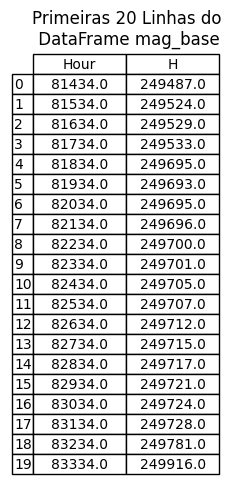

In [7]:
# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(3, 5.5))  # Define o tamanho da imagem

# Ocultar o eixo
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = table(ax, mag_base.head(20), loc='center', cellLoc='center', colWidths=[0.1]*len(mag_base.head(20).columns))

# Ajustar o tamanho da tabela para caber na figura
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(4, 1.2)

# Mostrar a figura
plt.title('Primeiras 20 Linhas do\n DataFrame mag_base')
plt.show()


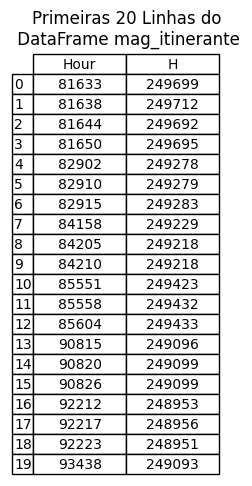

In [8]:
# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(3, 5.5))  # Define o tamanho da imagem

# Ocultar o eixo
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

tbl = table(ax, mag_itinerante.head(20), loc='center', cellLoc='center', colWidths=[0.1]*len(mag_itinerante.head(20).columns))

# Ajustar o tamanho da tabela para caber na figura
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(4, 1.2)

# Mostrar a figura
plt.title('Primeiras 20 Linhas do\n DataFrame mag_itinerante')
plt.show()


In [9]:
# Transformando em DataFrames
mag_base_df = pd.DataFrame(mag_base)
mag_itinerante_df = pd.DataFrame(mag_itinerante)

In [10]:
mag_itinerante

,Hour,H
0,81633,249699
1,81638,249712
2,81644,249692
3,81650,249695
4,82902,249278
...,...,...
47,130803,249357
48,130809,249359
49,143815,249873
50,143820,249866


### Interpolando a Estação Base

#### Interpolando os valores da Hora

In [11]:
interval = np.arange(81434.0, 145134.0,1)  # Intervalo de valores desejado para a coluna 'A'

# Cria um novo DataFrame com a coluna 'A' expandida para o intervalo desejado

expanded_df = pd.DataFrame({'Hour': interval})

expanded_df

,Hour
0,81434.0
1,81435.0
2,81436.0
3,81437.0
4,81438.0
...,...
63695,145129.0
63696,145130.0
63697,145131.0
63698,145132.0


Left Join (Junção pela Esquerda)
Quando você usa how='left', está especificando que quer realizar uma junção pela esquerda. Isso significa que:

Todas as linhas do DataFrame da esquerda (o primeiro DataFrame que você passou para pd.merge) serão mantidas.
Para as linhas do DataFrame da esquerda que encontram correspondência no DataFrame da direita (o segundo DataFrame passado para pd.merge), os valores correspondentes do DataFrame da direita serão adicionados.
Para as linhas do DataFrame da esquerda que não encontram correspondência no DataFrame da direita, os valores das colunas do DataFrame da direita serão preenchidos com NaN.

In [12]:
mag_base_df = pd.merge(expanded_df, mag_base_df, on='Hour', how='left')
mag_base_df

,Hour,H
0,81434.0,249487.0
1,81435.0,NaN
2,81436.0,NaN
3,81437.0,NaN
4,81438.0,NaN
...,...,...
63695,145129.0,NaN
63696,145130.0,NaN
63697,145131.0,NaN
63698,145132.0,NaN


#### Interpolando os valores de H

In [13]:
mag_base_df = mag_base_df.interpolate(method='spline',order=1)

In [14]:
mag_base_df

,Hour,H
0,81434.0,249487.000000
1,81435.0,249487.386457
2,81436.0,249487.755951
3,81437.0,249488.125446
4,81438.0,249488.494940
...,...,...
63695,145129.0,249736.130476
63696,145130.0,249736.064271
63697,145131.0,249735.998065
63698,145132.0,249735.931860


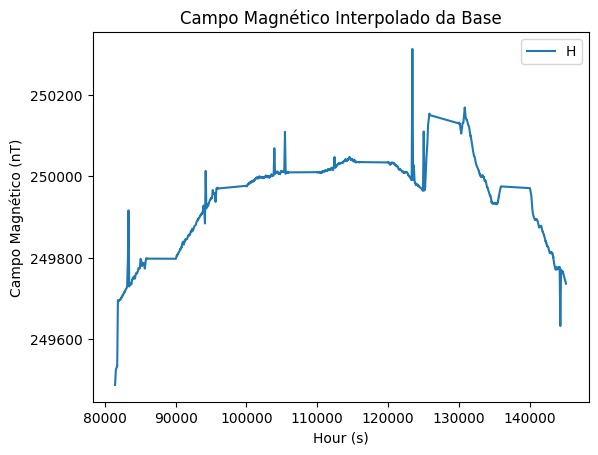

In [15]:
mag_base_df.plot(x='Hour', y='H', kind='line')
plt.title('Campo Magnético Interpolado da Base')
plt.xlabel('Hour (s)')
plt.ylabel('Campo Magnético (nT)')
plt.show()


### Criando um novo Dataframe Mag Itinerante (Hour+H) + H_base

In [16]:
horas_itinerante = list(mag_itinerante_df['Hour'])
horas_base = list(mag_base_df['Hour'])

In [17]:
H_base=[]
indice=0
for i in horas_itinerante:
      for j in horas_base:
            if i==j:
                  indice=horas_base.index(j)
                  H_base.append(mag_base_df.loc[indice]['H'])
            else:
                  continue


H_base

[249528.88372911213,
 249529.10610034267,
 249529.36515250723,
 249529.62420467174,
 249719.74457247093,
 249719.99878117043,
 249720.1576616076,
 249752.301817448,
 249749.65733905206,
 249749.37601156314,
 249784.93853691718,
 249783.9354675837,
 249777.34386910667,
 249825.74687043473,
 249825.91624348346,
 249826.11949114196,
 249863.45337298795,
 249863.35540467576,
 249863.23784270108,
 249901.63445653315,
 249901.77305068474,
 249901.93936366666,
 249931.39152340643,
 249931.03719770207,
 249930.6828719978,
 249962.00483371192,
 249963.94642654658,
 249966.211618187,
 249987.1562586277,
 249987.17798614892,
 249987.2040591743,
 249996.74211264597,
 249996.723086287,
 249996.70723098793,
 250006.54738616626,
 250007.4163765274,
 250007.51293101197,
 250031.20724743383,
 250031.7012570805,
 250031.75614704125,
 250041.0,
 250040.1938835426,
 250040.0891369398,
 249975.50848662073,
 249975.4207203167,
 249975.34758173002,
 250153.79864026455,
 250162.7694393272,
 250163.96554586885

In [18]:
mag_itinerante_df['H_base']= H_base

In [19]:
mag_itinerante_df

,Hour,H,H_base
0,81633,249699,249528.883729
1,81638,249712,249529.106100
2,81644,249692,249529.365153
3,81650,249695,249529.624205
4,82902,249278,249719.744572
...,...,...,...
47,130803,249357,250162.769439
48,130809,249359,250163.965546
49,143815,249873,249775.654757
50,143820,249866,249776.003077


#### Criando nova coluna do novo Dataframe com Incrementos e Decrementos para o H_base

In [20]:
delta = []
a0=0
for i in H_base:
    if a0==0: # Se for o primeiro item de H_base a posição dos incrementos recebe o valor 0
        delta.append(0)
        a0+=1
    else:
        delta.append((-1)*(i-H_base[H_base.index(i)-1])) # Pega o  H_base subtrai de seu antecessor. Multiplicando por (-1)
        # Se o sucessor for um número maior, ocorre um incremento então se subtrai
        # Se o sucessor dor um número menor, ocorre um decremento então se aumenta

###### NOVA ABORDAGEM - MARCOS

In [21]:
delta = []
a0=0
for i in H_base:
    if a0==0: # Se for o primeiro item de H_base a posição dos incrementos recebe o valor 0
        delta.append(0)
        a0+=1
    else:
        delta.append((i-H_base[0])) 
        #Pega os valores de  H_base e subtrai de seu primeiro número.
       

In [22]:
delta

[0,
 0.2223712305421941,
 0.48142339510377496,
 0.7404755596071482,
 190.86084335879423,
 191.11505205830326,
 191.27393249547458,
 223.418088335864,
 220.77360993993352,
 220.49228245101403,
 256.05480780504877,
 255.05173847157857,
 248.46013999453862,
 296.86314132259577,
 297.0325143713271,
 297.23576202982804,
 334.56964387581684,
 334.47167556363274,
 334.3541135889536,
 372.750727421022,
 372.88932157261297,
 373.05563455453375,
 402.5077942943026,
 402.1534685899387,
 401.79914288566215,
 433.1211045997916,
 435.06269743444864,
 437.32788907486247,
 458.2725295155833,
 458.2942570367886,
 458.3203300621826,
 467.8583835338359,
 467.83935717487475,
 467.8235018757987,
 477.66365705413045,
 478.532647415268,
 478.6292018998356,
 502.3235183217039,
 502.8175279683783,
 502.87241792911664,
 512.1162708878692,
 511.3101544304809,
 511.205407827656,
 446.62475750860176,
 446.5369912045717,
 446.46385261788964,
 624.9149111524166,
 633.8857102150796,
 635.0818167567195,
 246.771027626

#### Criando uma nova coluna que soma o H do mag itinerante + o incremento ou decremento:

In [23]:
mag_itinerante_df['Delta']= delta
mag_itinerante_df

,Hour,H,H_base,Delta
0,81633,249699,249528.883729,0.000000
1,81638,249712,249529.106100,0.222371
2,81644,249692,249529.365153,0.481423
3,81650,249695,249529.624205,0.740476
4,82902,249278,249719.744572,190.860843
...,...,...,...,...
47,130803,249357,250162.769439,633.885710
48,130809,249359,250163.965546,635.081817
49,143815,249873,249775.654757,246.771028
50,143820,249866,249776.003077,247.119348


In [24]:
mag_itinerante_df['H_final']= mag_itinerante_df['H']+mag_itinerante_df['Delta']
mag_itinerante_df

,Hour,H,H_base,Delta,H_final
0,81633,249699,249528.883729,0.000000,249699.000000
1,81638,249712,249529.106100,0.222371,249712.222371
2,81644,249692,249529.365153,0.481423,249692.481423
3,81650,249695,249529.624205,0.740476,249695.740476
4,82902,249278,249719.744572,190.860843,249468.860843
...,...,...,...,...,...
47,130803,249357,250162.769439,633.885710,249990.885710
48,130809,249359,250163.965546,635.081817,249994.081817
49,143815,249873,249775.654757,246.771028,250119.771028
50,143820,249866,249776.003077,247.119348,250113.119348


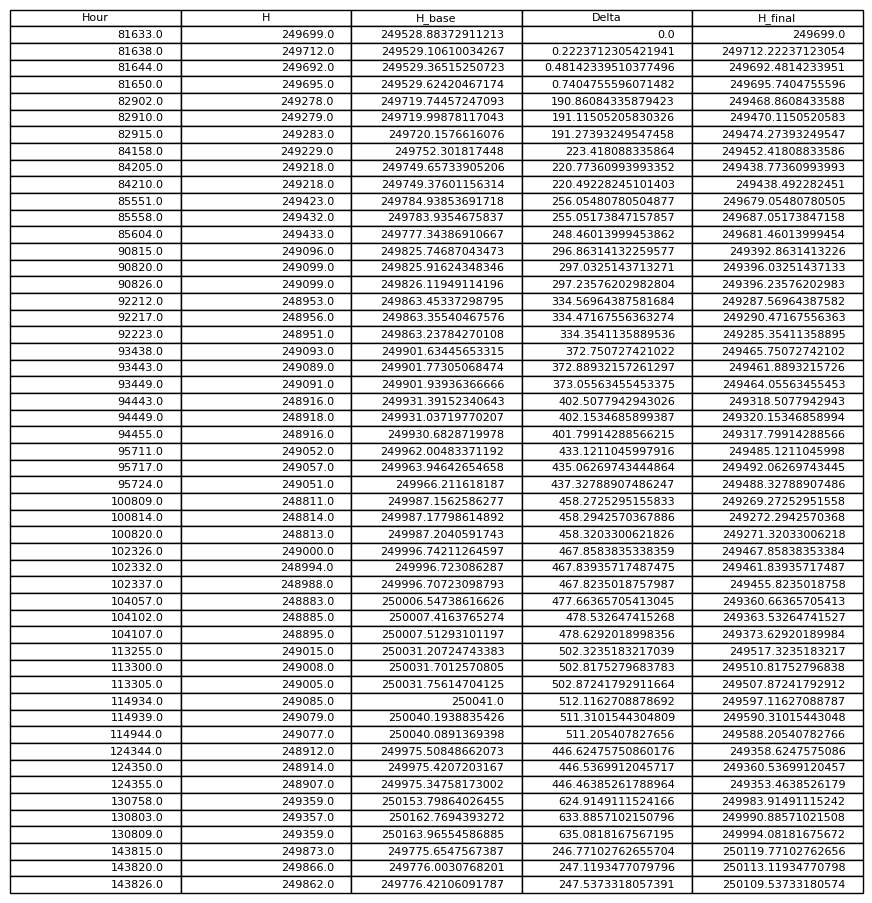

In [25]:
# Definir o tamanho da figura
plt.figure(figsize=(11, 6))

# Plotar o DataFrame como uma tabela
plt.table(cellText=mag_itinerante_df.values, 
          colLabels=mag_itinerante_df.columns, 
          loc='center')

# Remover os eixos
plt.axis('off')

# plt.title('DataFrame mag_itinerante')


# Mostrar a figura
plt.show()

#### Resultado da manipulação

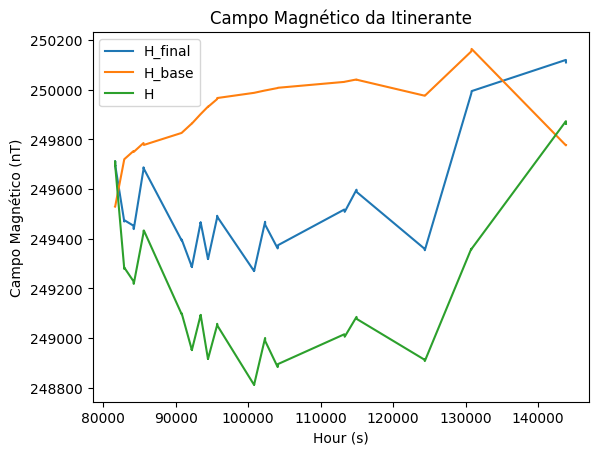

In [41]:
mag_itinerante_df.plot(x='Hour', y=['H_final','H_base','H'], kind='line')
plt.title('Campo Magnético da Itinerante')
plt.xlabel('Hour (s)')
plt.ylabel('Campo Magnético (nT)')
plt.show()
